## I. Introduction

Nama    : Theo Nugraha

Batch   : FTDS-021-RMT

### I.I. Project Background

I am a Data Scientist working at one of the world's survey agencies. Here I was assigned to create a system to predict income based on its group. In this project, the income group is divided into 2, namely: income greater than 50k and income less than and equal to 50k.

### I.II. About Dataset

[**SOURCE DATASET**](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=census_adult_income&page=table)

Query :

`SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket 
FROM `bigquery-public-data.ml_datasets.census_adult_income` 
WHERE hours_per_week <= 100 AND workclass != ' ?';`

This dataset contains features :
1. Age              : Age
2. Workclass        : Nature of employment
3. Education        : Level of education completed
4. Education_num    : Estimated years of education completed based on the value of the education field
5. Marital_status   : Marital status
6. Occupation       : Occupation category
7. Relationship     : Relationship to the household
8. Race             : Race
9. Sex              : Gender
10. Capital_gain    : Amount of capital gains
11. Capital_loss    : Amount of capital loss
12. Hours_per_week  : Hours worked per week
13. Native_country  : Country of birth
14. Income_bracket  : Either ">50K" or "<=50K" based on income

### I.III. Objective

This project aims to predict income based on its group using Logistic Regression and Support Vector Classification methods.

## II. Import Library

In [556]:
#Import Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## III. Data Loading

In [343]:
# Data Loading

df = pd.read_csv('h8dsft_P1G2_theo.csv')
df


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30720,46,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
30721,45,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
30722,32,Private,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
30723,30,Self-emp-not-inc,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K


In [344]:
# Duplicate Dataset

data_backup = df.copy()

In [345]:
# Check Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30725 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       30725 non-null  object
 3   education_num   30725 non-null  int64 
 4   marital_status  30725 non-null  object
 5   occupation      30725 non-null  object
 6   relationship    30725 non-null  object
 7   race            30725 non-null  object
 8   sex             30725 non-null  object
 9   capital_gain    30725 non-null  int64 
 10  capital_loss    30725 non-null  int64 
 11  hours_per_week  30725 non-null  int64 
 12  native_country  30725 non-null  object
 13  income_bracket  30725 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.3+ MB


In this dataset, there are 14 columns with 5 columns of integer data type and 9 columns of object data type.

In [346]:
# Check Missing Value

df.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

There is no missing value.

In [347]:
# Duplication Check 

df.duplicated().sum()

3261

Based on the duplication check, there are 3261 duplicated rows.

In [348]:
# Show duplicated row

df[df.duplicated(keep=False)]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
29,44,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
31,44,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
73,61,Private,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
89,61,Private,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
115,42,Private,9th,5,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,22,Private,Some-college,10,Never-married,Other-service,Other-relative,Black,Male,0,0,20,United-States,<=50K
30566,24,Private,Some-college,10,Never-married,Sales,Other-relative,Black,Female,0,0,40,United-States,<=50K
30567,24,Private,Some-college,10,Never-married,Sales,Other-relative,Black,Female,0,0,40,United-States,<=50K
30615,21,Private,Some-college,10,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K


In [349]:
# Remove duplicate data

df.drop_duplicates(keep='first', inplace=True)

In [350]:
# Duplication Check 

df.duplicated().sum()

0

In [351]:
# Check Basic Statistic

df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,27464.000000,27464.000000,27464.000000,27464.000000,27464.000000
mean,39.039215,10.153146,1228.414506,98.887744,41.177287
std,13.171139,2.632526,7893.802855,426.660883,12.347665
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Based on the basic statistics check above, there are several findings, namely:
1. Based on the distribution, the variables `age`, `education_num` and `hours_per_week` seem to be quite symmetrical. This is because the mean and median (50th percentile) values are close.
2. There is no indication of data that has unnatural values, such as minus values.
3. The variables `capital_gain` and `capital_loss` seem to be not quite symmetrical. This is because the mean and median (50th percentile) values are too far.

In [352]:
# Cardinality Check

print('Shape of Dataset : ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].nunique())
  print('')

Shape of Dataset :  (27464, 14)

Col :  age
Length Unique Value :  72

Col :  workclass
Length Unique Value :  8

Col :  education
Length Unique Value :  16

Col :  education_num
Length Unique Value :  16

Col :  marital_status
Length Unique Value :  7

Col :  occupation
Length Unique Value :  15

Col :  relationship
Length Unique Value :  6

Col :  race
Length Unique Value :  5

Col :  sex
Length Unique Value :  2

Col :  capital_gain
Length Unique Value :  118

Col :  capital_loss
Length Unique Value :  90

Col :  hours_per_week
Length Unique Value :  94

Col :  native_country
Length Unique Value :  42

Col :  income_bracket
Length Unique Value :  2



Based on the cardinality, we can see that `native_country`, `education` and `occupation` have high cardinality. It is likely that we will not use these features.

## IV. Exploratory Data Analysis (EDA)

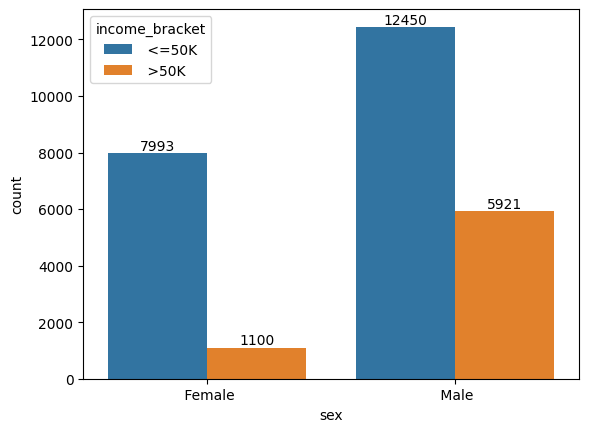

In [353]:
# Count Plot `income_bracket` based on `sex`

income_status = sns.countplot(data=df, x="sex", hue="income_bracket")

for container in income_status.containers:
    income_status.bar_label(container)

plt.show()

Based on the diagram above, we can see that the total income of male is superior to that of female. Both from the income group of less than 50,000 and the income group of more than 50,000.

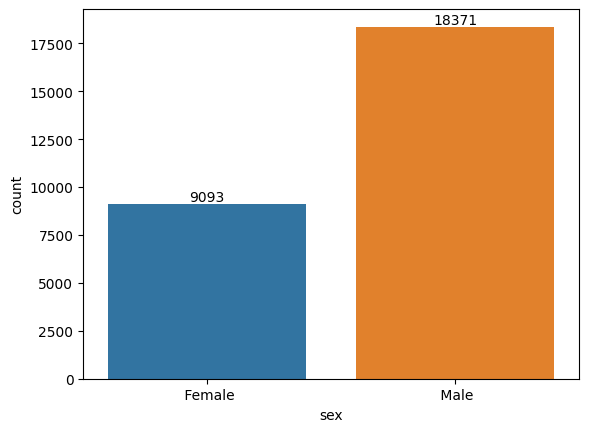

In [354]:
# Count Plot `sex`

gender = sns.countplot(data=df, x="sex")

for container in gender.containers:
    gender.bar_label(container)

plt.show()

Based on the diagram above, we can see that in this dataset, the number of male is greater than the number of female.

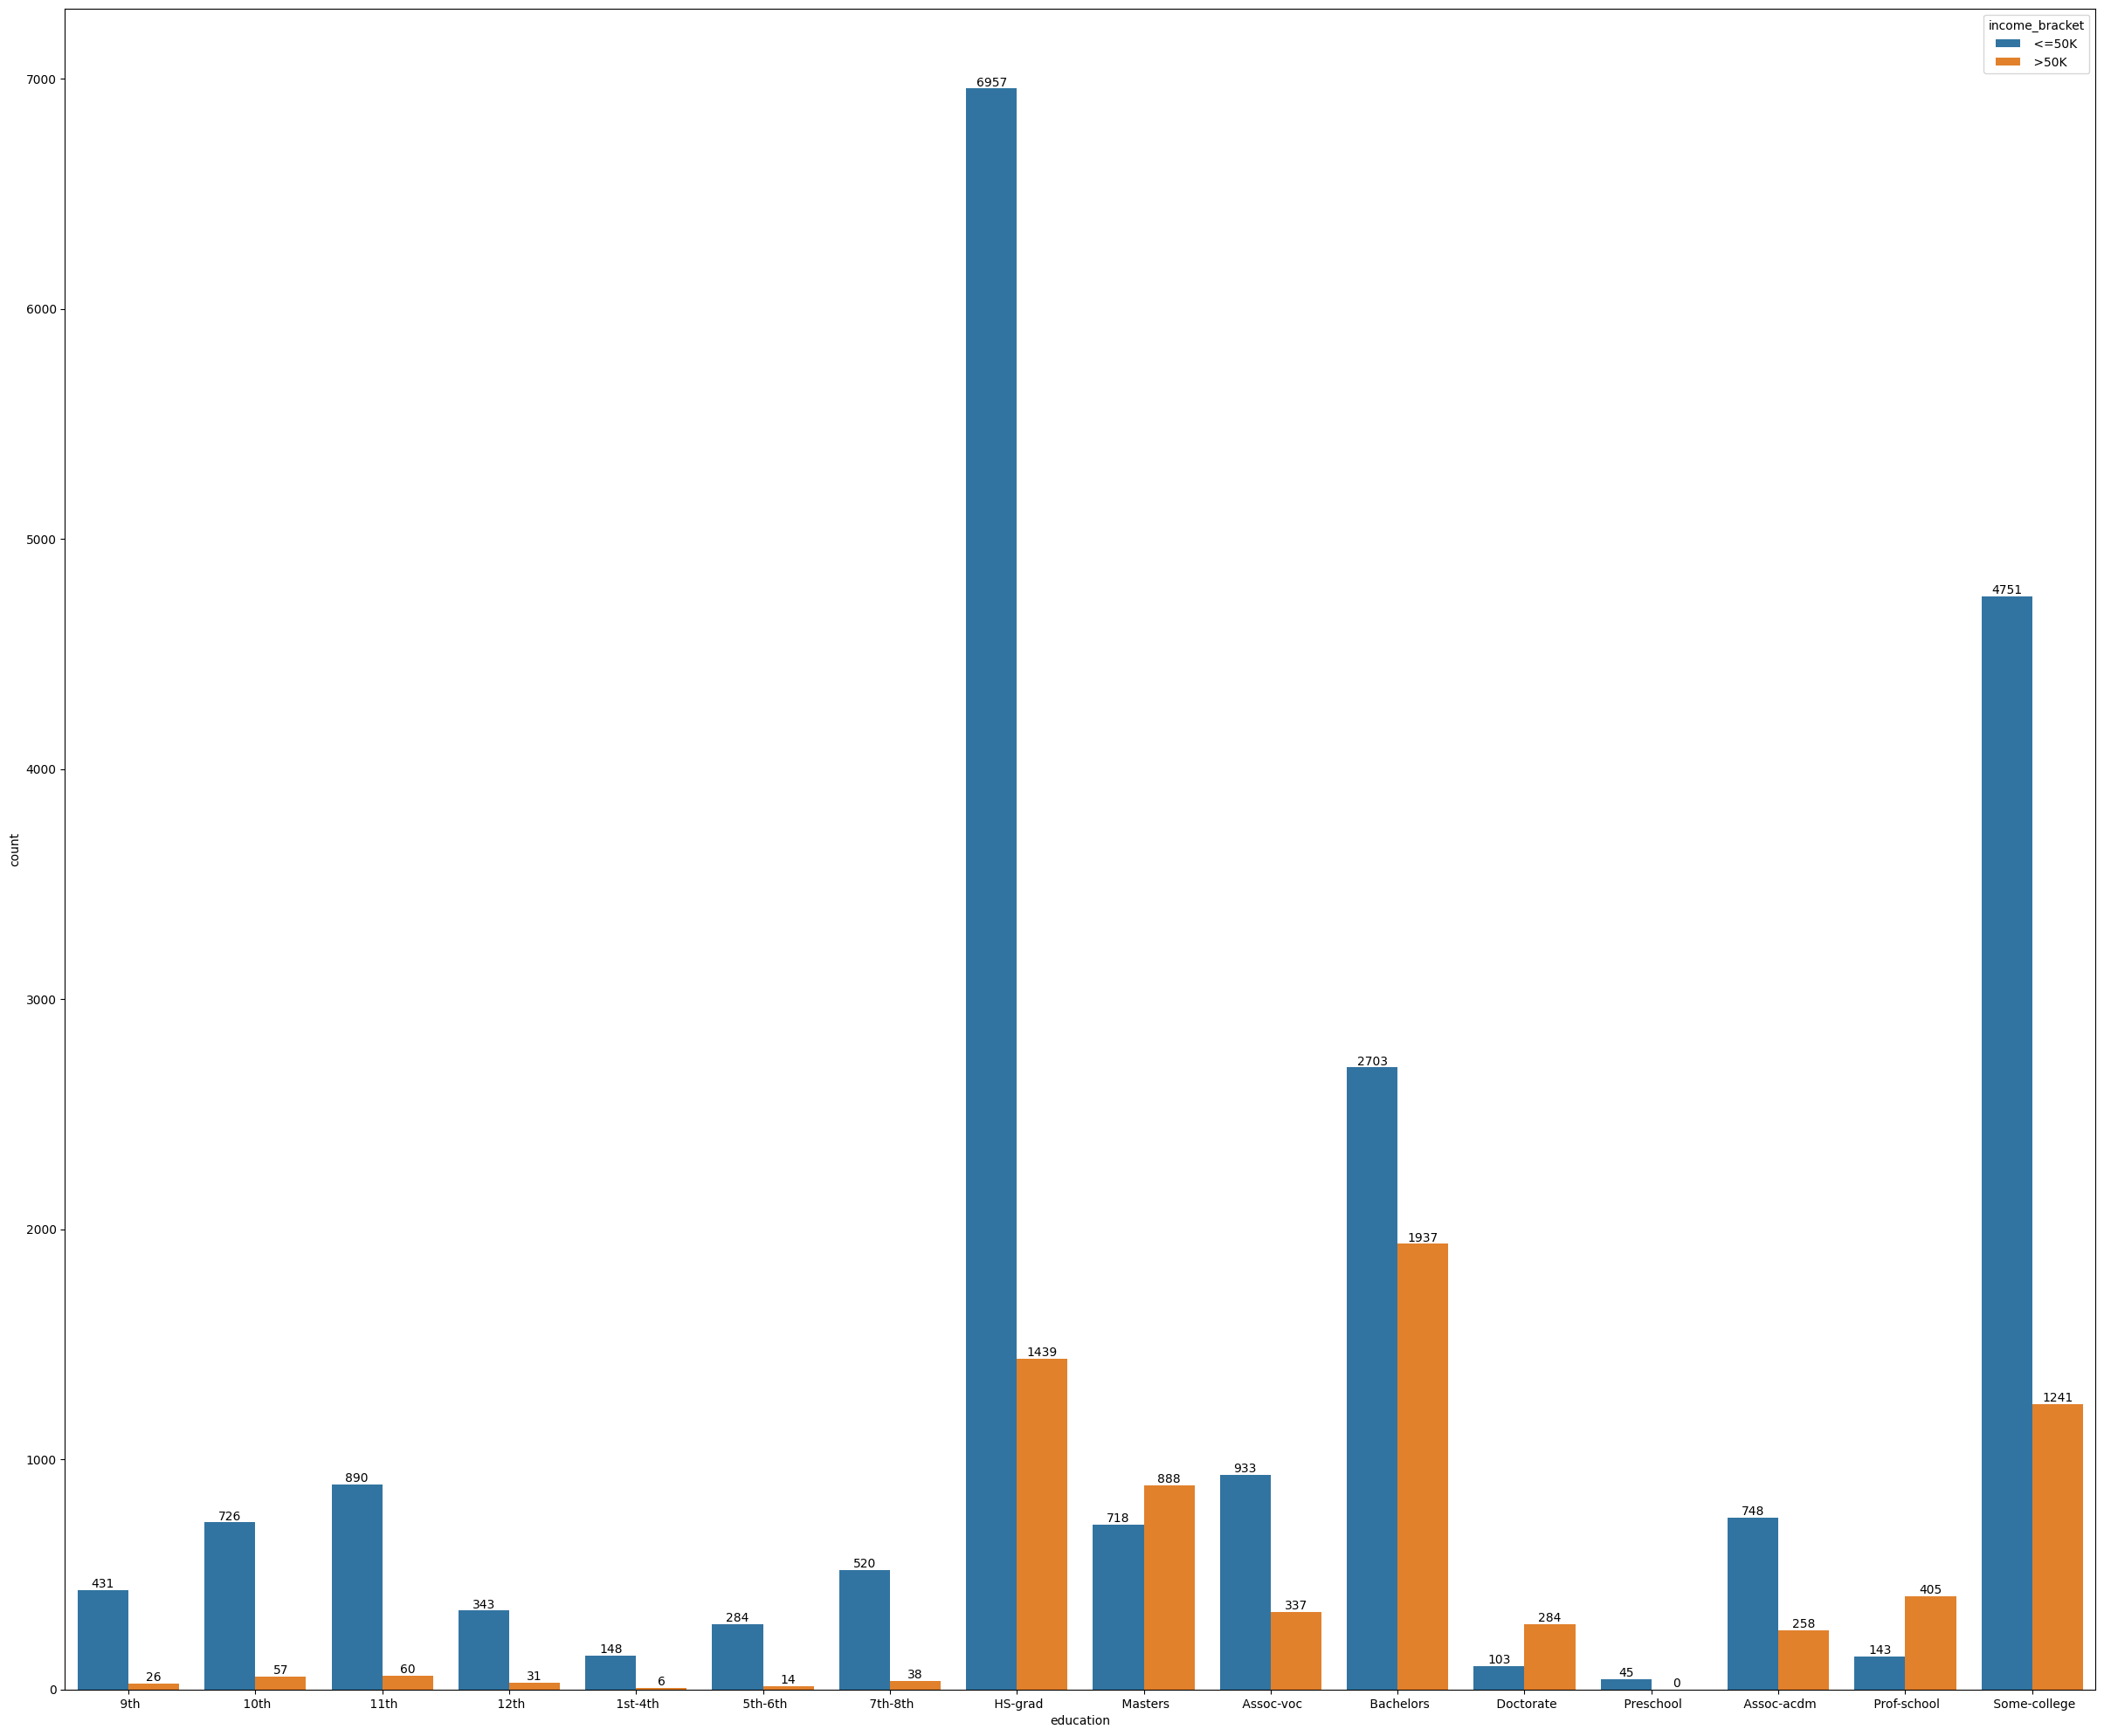

In [355]:
# Count Plot `income_bracket` based on `education`

plt.figure(figsize=(30,25))
edu = sns.countplot(data=df, x="education", hue='income_bracket')

for container in edu.containers:
    edu.bar_label(container)

plt.show()

Based on the diagram above, we can see that the `HS-grad` education level is most prevalent in the less than 50,000 income group, while the `Bachelor` education level is most prevalent in the more than 50,000 income group.

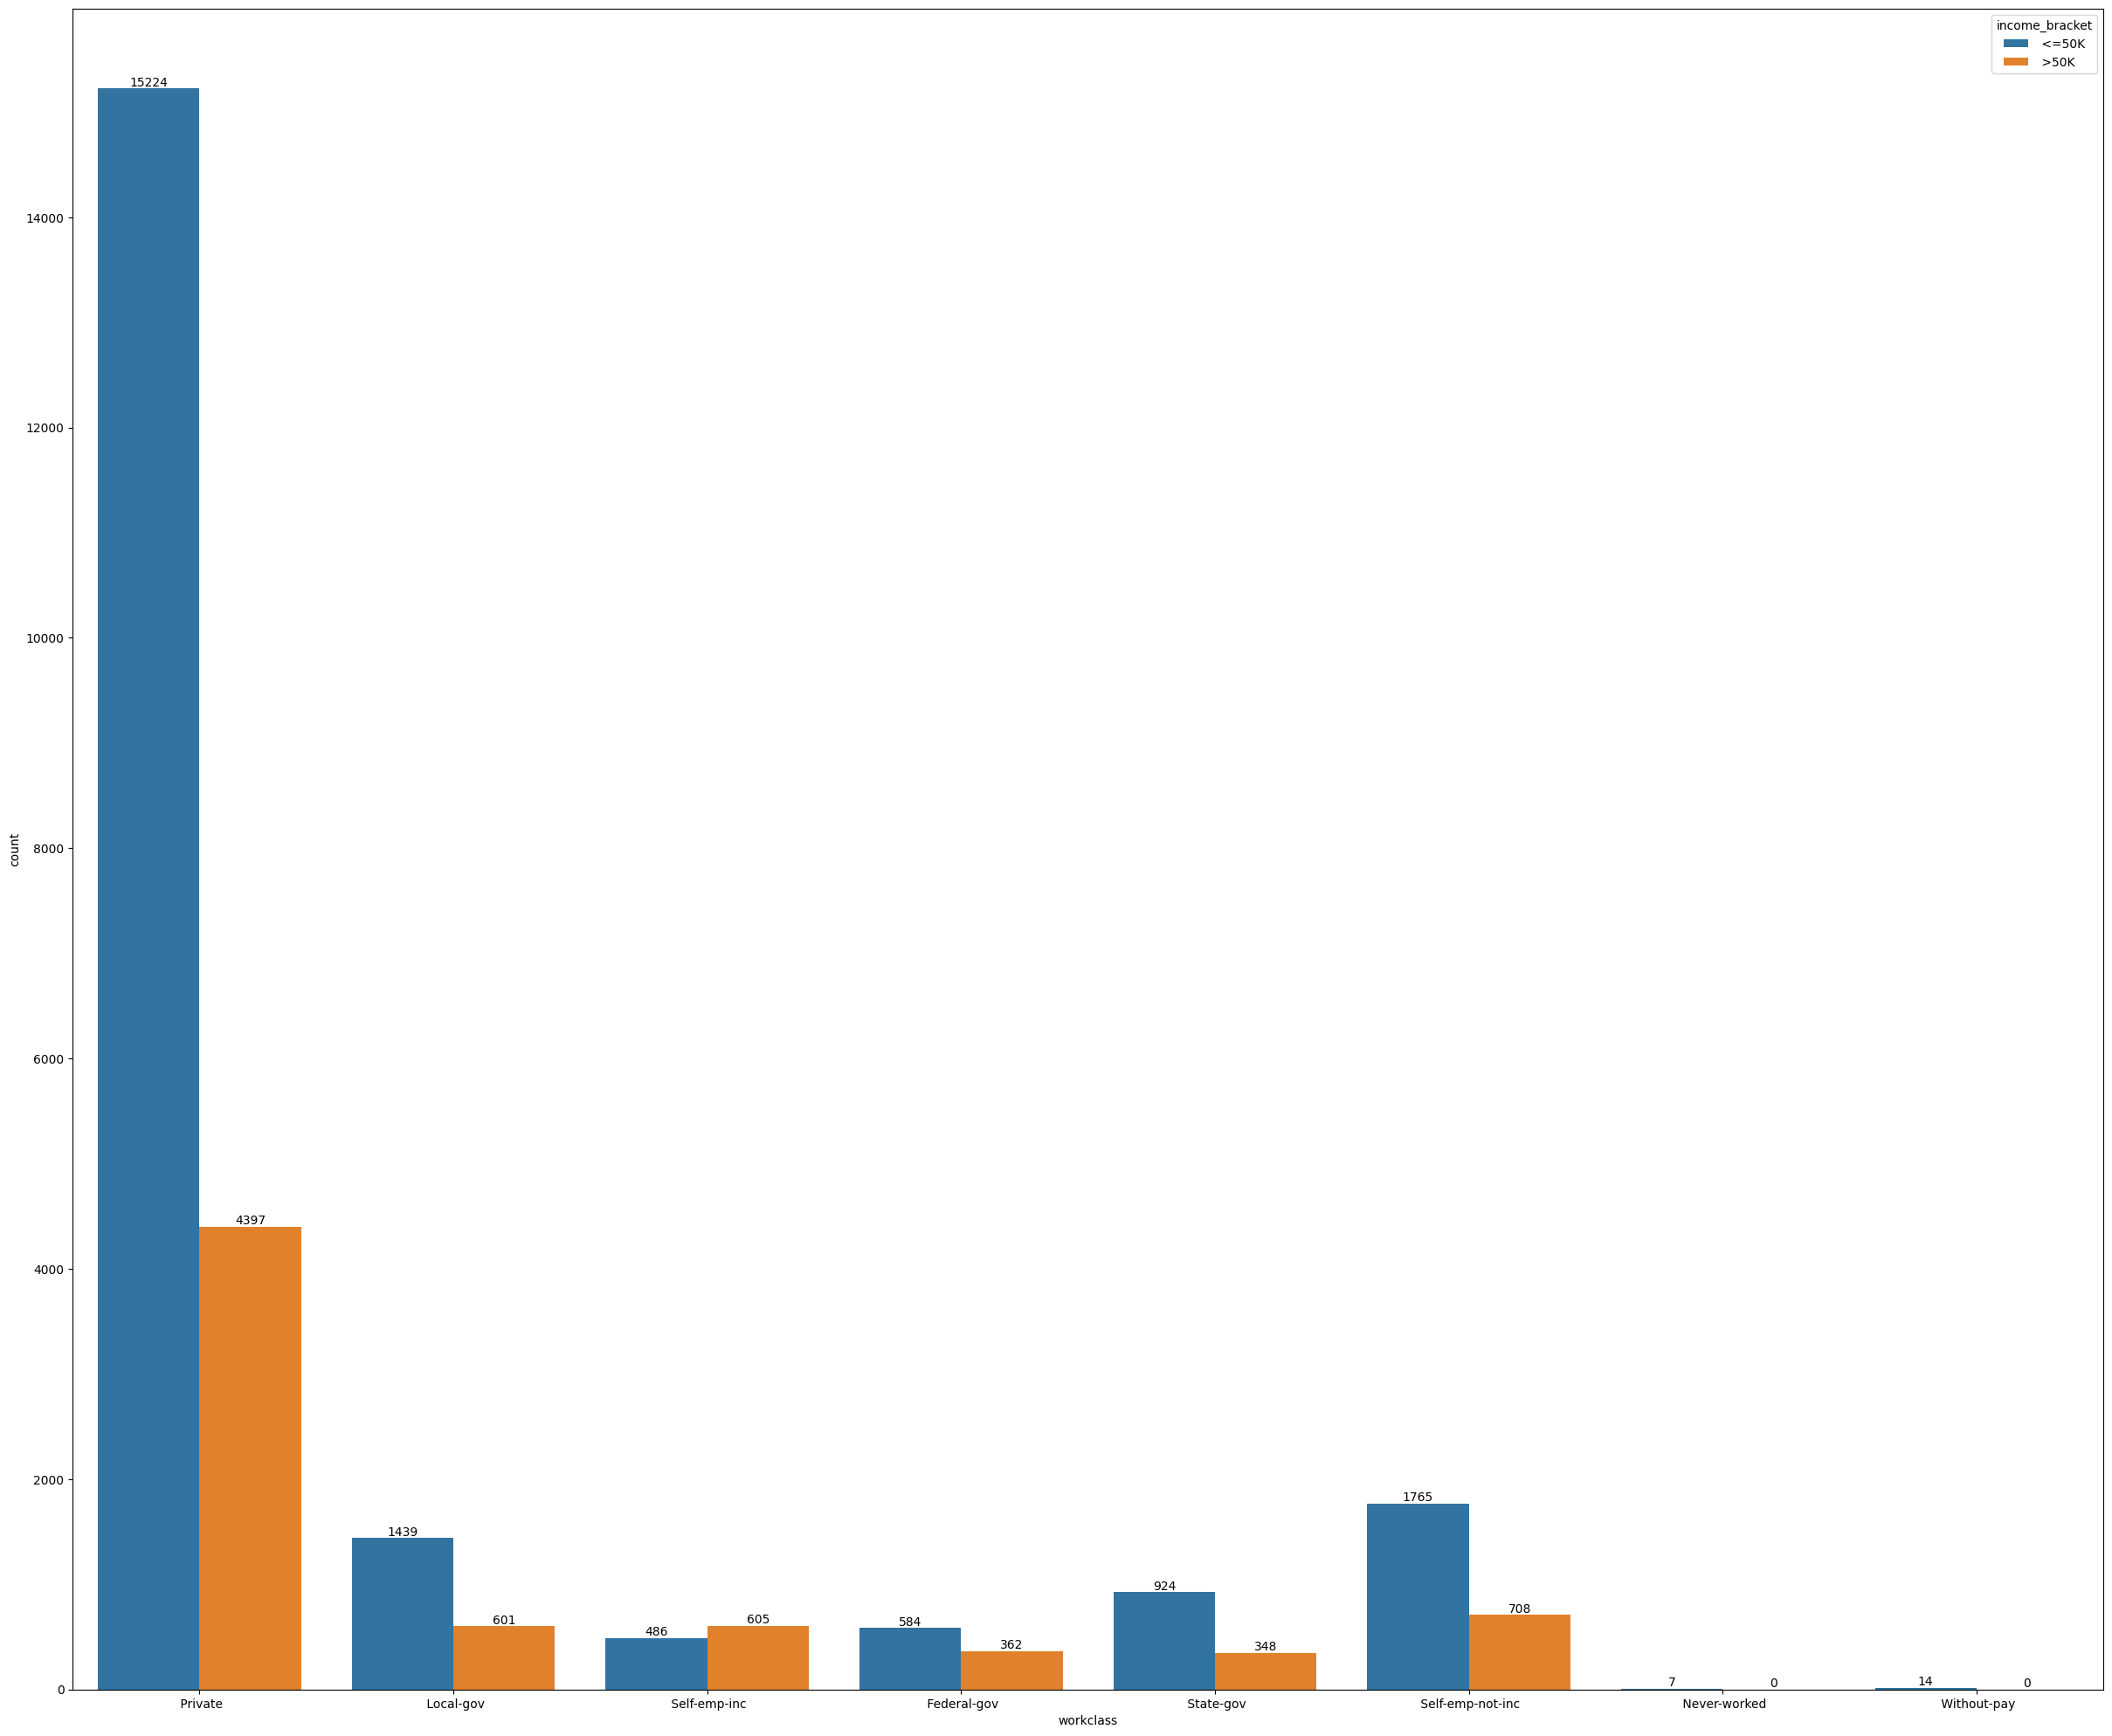

In [356]:
# Count Plot `income_bracket` based on `workclass`

plt.figure(figsize=(30,25))
work = sns.countplot(data=df, x="workclass", hue='income_bracket')

for container in work.containers:
    work.bar_label(container)

plt.show()

Based on the diagram above, the `Private` workclass is the workclass that falls into the income group below 50,000 and above 50,000 the most compared to other workclasses.

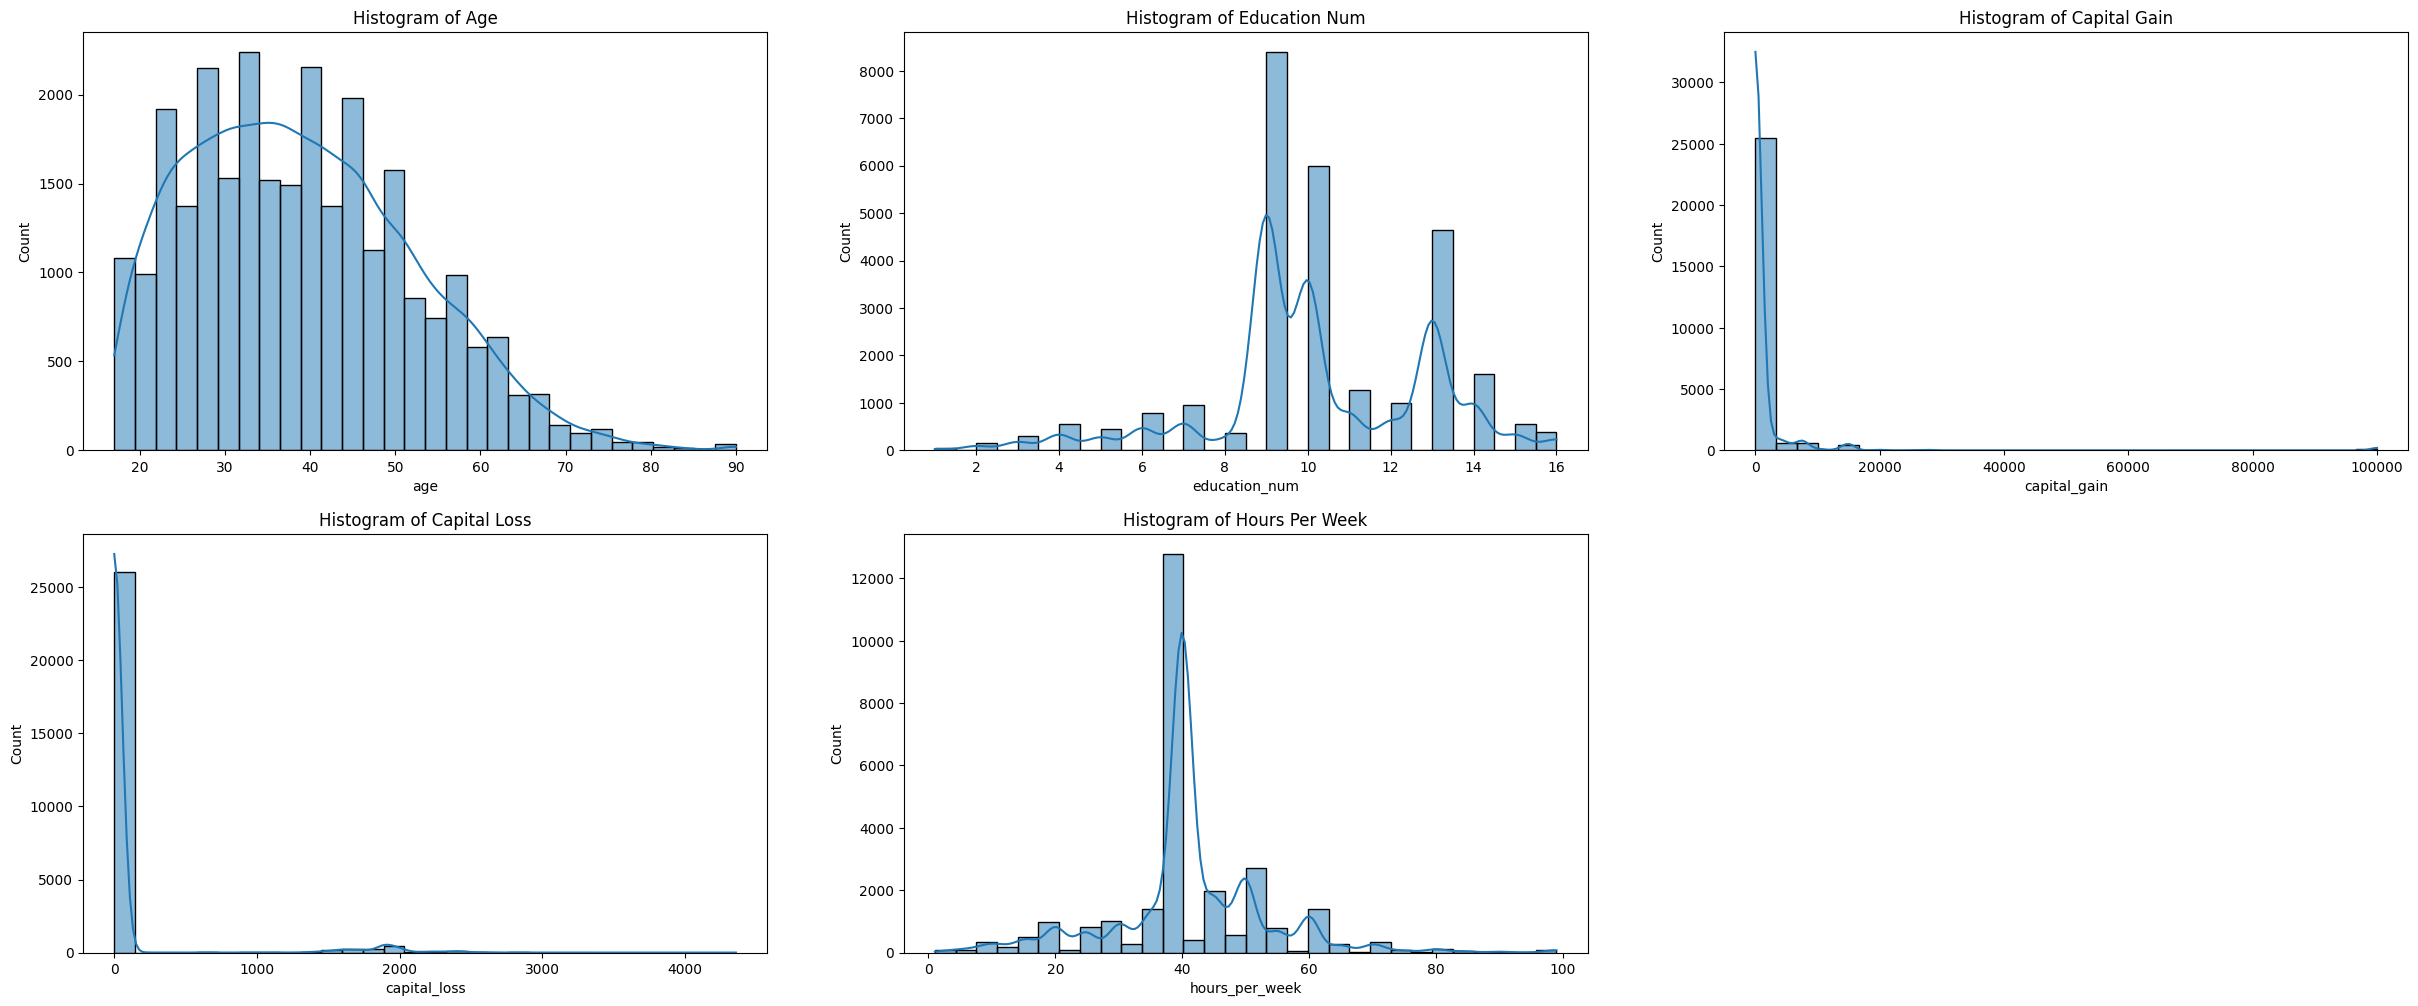

In [357]:
# Create Histogram

plt.figure(figsize=(30,25))

plt.subplot(4,3,1)
sns.histplot(df['age'], kde=True, bins = 30)
plt.title('Histogram of Age')

plt.subplot(4,3,2)
sns.histplot(df['education_num'], kde=True, bins = 30)
plt.title('Histogram of Education Num')

plt.subplot(4,3,3)
sns.histplot(df['capital_gain'], kde=True, bins = 30)
plt.title('Histogram of Capital Gain')

plt.subplot(4,3,4)
sns.histplot(df['capital_loss'], kde=True, bins = 30)
plt.title('Histogram of Capital Loss')

plt.subplot(4,3,5)
sns.histplot(df['hours_per_week'], kde=True, bins = 30)
plt.title('Histogram of Hours Per Week')

plt.show;


In [358]:
# Check Skewness 

print('FEATURES SKEWNESS')
print('-----------------')
print('')
print('Skewness Age             : ',df['age'].skew())
print('Skewness Education Num   : ',df['education_num'].skew())
print('Skewness Capital Gain    : ',df['capital_gain'].skew())
print('Skewness Capital Loss    : ',df['capital_loss'].skew())
print('Skewness Hours Per Week  : ',df['hours_per_week'].skew())

FEATURES SKEWNESS
-----------------

Skewness Age             :  0.5169450519906843
Skewness Education Num   :  -0.35277052810525233
Skewness Capital Gain    :  11.177547954456365
Skewness Capital Loss    :  4.246778756666671
Skewness Hours Per Week  :  0.3426891894940999


Based on the histogram and skewness level, we can tell that the data tends to be not normally distributed in the features `age`, `capital_gain` and `capital_loss`. In `education_num` and `hours_per_week` features, the data tends to be normally distributed.

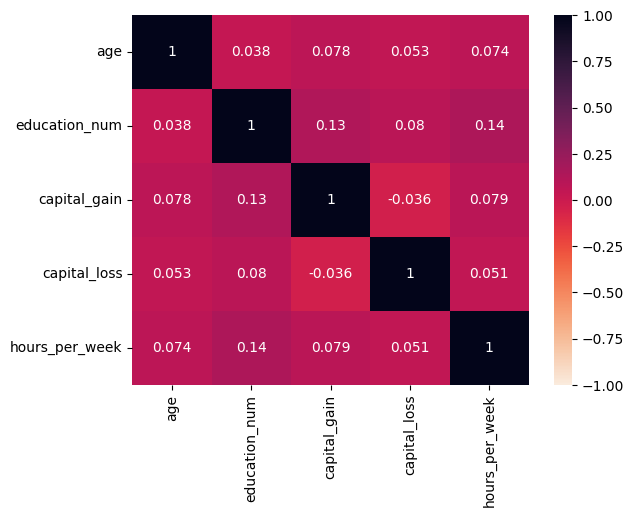

In [359]:
# Correlation Test

df_corr = df[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']]

# Plotting to simplify the process of analyzing the correlation between parameters.

sns.heatmap(df_corr.corr(), vmin=-1, vmax=1,
annot=True, cmap="rocket_r")
plt.show()

Based on the correlation test between numerical features, almost all features are weakly correlated with other features.

## V. Feature Engineering

### V.I. Split between X (Features) and y (Target)

In [360]:
# Splitting between X and y

X = df.drop(['income_bracket'], axis=1)
y = df['income_bracket']

X.head(3)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti


In [361]:
# Show shape on X and y

print(X.shape)
print(y.shape)

(27464, 13)
(27464,)


### V.II. Feature Selection

Due to the high cardinality, we will not use the features `education`, `occupation` and `native_country`.

In [362]:
# Drop column `education`, `occupation`, `native_country`

X.drop(['education', 'occupation', 'native_country'], axis=1, inplace=True)
X

,age,workclass,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,39,Private,5,Married-civ-spouse,Wife,Black,Female,3411,0,34
1,77,Private,5,Married-civ-spouse,Wife,Black,Female,0,0,10
2,38,Private,5,Married-civ-spouse,Wife,Black,Female,0,0,24
3,28,Private,5,Married-civ-spouse,Wife,Black,Female,0,0,40
4,37,Private,5,Married-civ-spouse,Wife,Black,Female,0,0,48
...,...,...,...,...,...,...,...,...,...,...
30720,46,Private,10,Married-civ-spouse,Other-relative,Asian-Pac-Islander,Male,0,0,40
30721,45,Private,10,Married-civ-spouse,Other-relative,Asian-Pac-Islander,Male,0,0,40
30722,32,Private,10,Married-civ-spouse,Other-relative,Asian-Pac-Islander,Female,0,0,40
30723,30,Self-emp-not-inc,10,Never-married,Other-relative,Asian-Pac-Islander,Male,0,2258,40


### V.III. Split between Train-set and Test-set

I will divide the data into 2, namely data for train and data for test. In this case, I will use an 80/20 ratio with 80% being the data for train and 20% being the data for test.

In [363]:
# Splitting between train set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
X_train.head(3)

Train size :  (21971, 10)
Test size :  (5493, 10)


,age,workclass,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week
22637,28,Private,12,Married-civ-spouse,Husband,White,Male,0,0,40
29118,45,Private,10,Divorced,Not-in-family,White,Male,0,0,30
27980,27,Self-emp-inc,10,Never-married,Own-child,White,Female,0,0,45


In [364]:
# Basic Statistic Checking

X_train.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000
mean,39.090619,10.163761,1259.910746,100.448091,41.207000
std,13.159874,2.639006,8132.891927,430.550855,12.296708
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### V.IV. Handling Outlier

In [365]:
# Make function to show histogram & boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### V.III.I. Check Feature Scewness & Outlier on X using Histogram & Boxplot

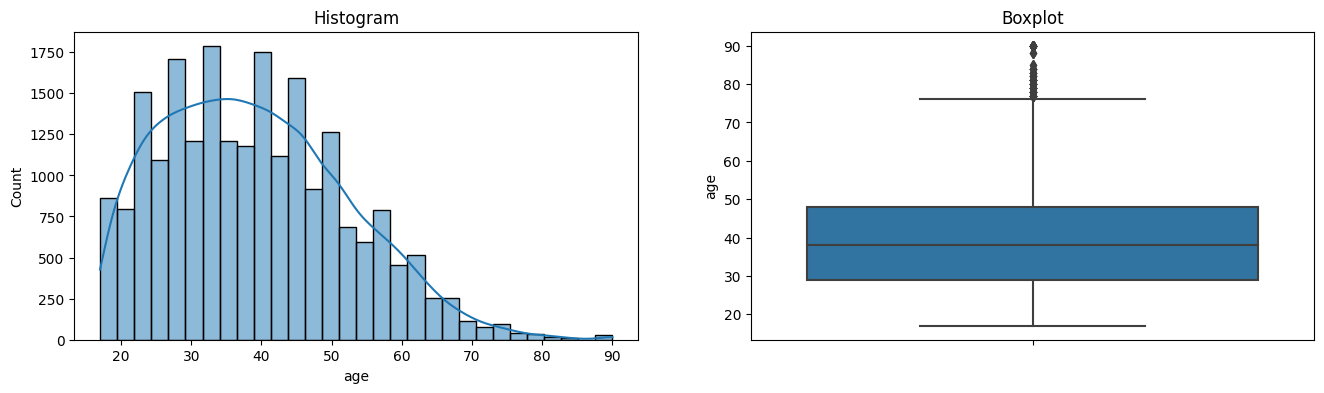


Skewness Value :  0.5114897075944436


In [366]:
# Set value histogram & boxplot and show skewness from feature age

diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

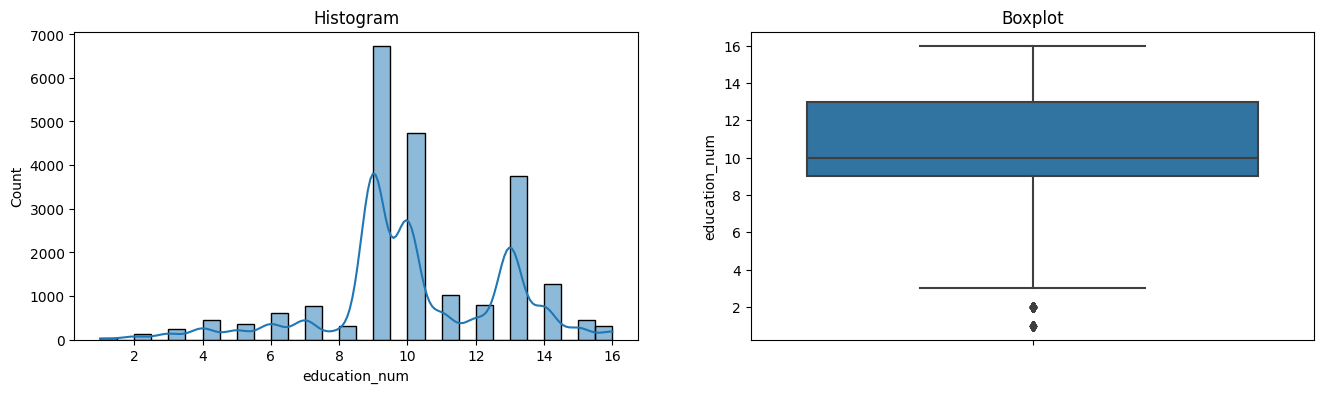


Skewness Value :  -0.34810802046614664


In [367]:
# Set value histogram & boxplot and show skewness from feature education_num

diagnostic_plots(X_train, 'education_num')
print('\nSkewness Value : ', X_train['education_num'].skew())

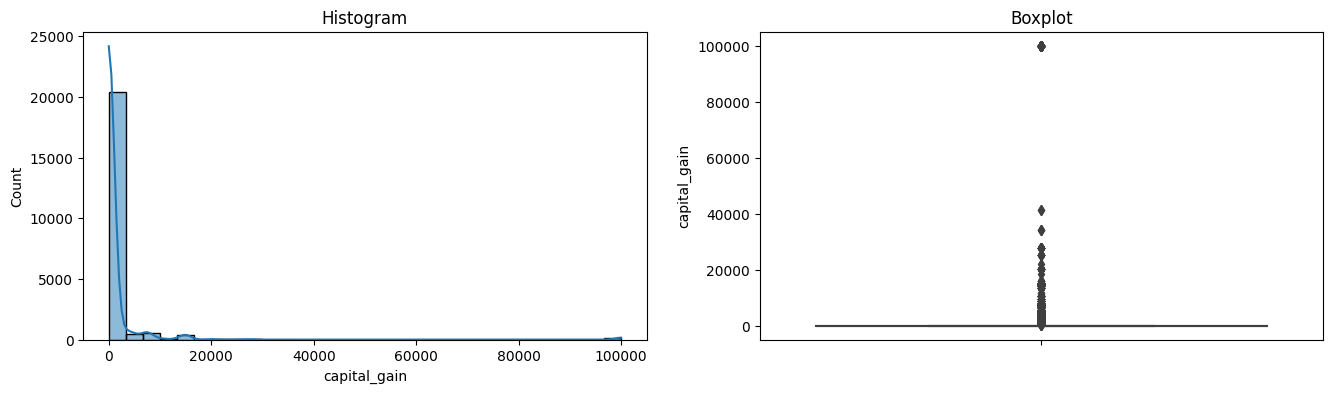


Skewness Value :  10.92475675891701


In [368]:
# Set value histogram & boxplot and show skewness from feature capital_gain

diagnostic_plots(X_train, 'capital_gain')
print('\nSkewness Value : ', X_train['capital_gain'].skew())

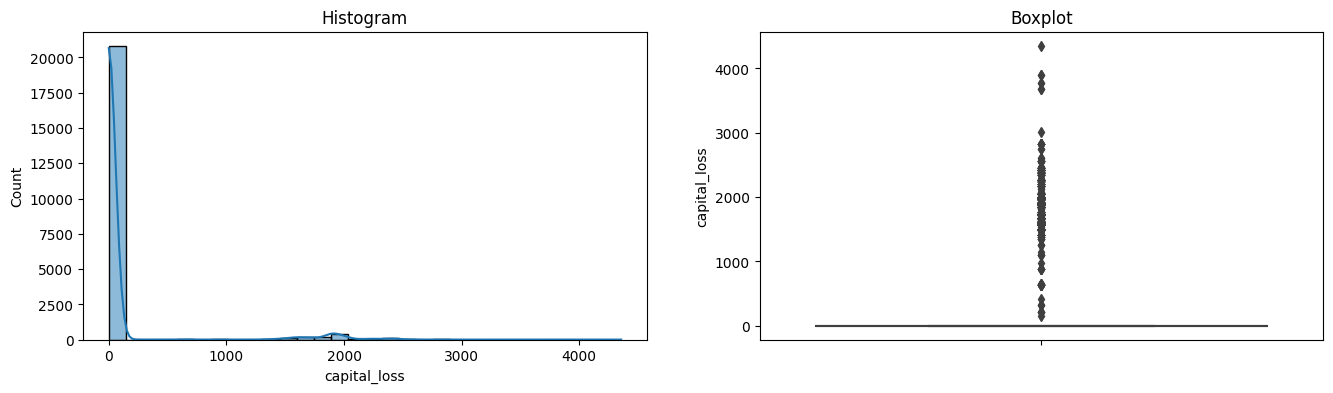


Skewness Value :  4.221671313755516


In [369]:
# Set value histogram & boxplot and show skewness from feature capital_loss

diagnostic_plots(X_train, 'capital_loss')
print('\nSkewness Value : ', X_train['capital_loss'].skew())

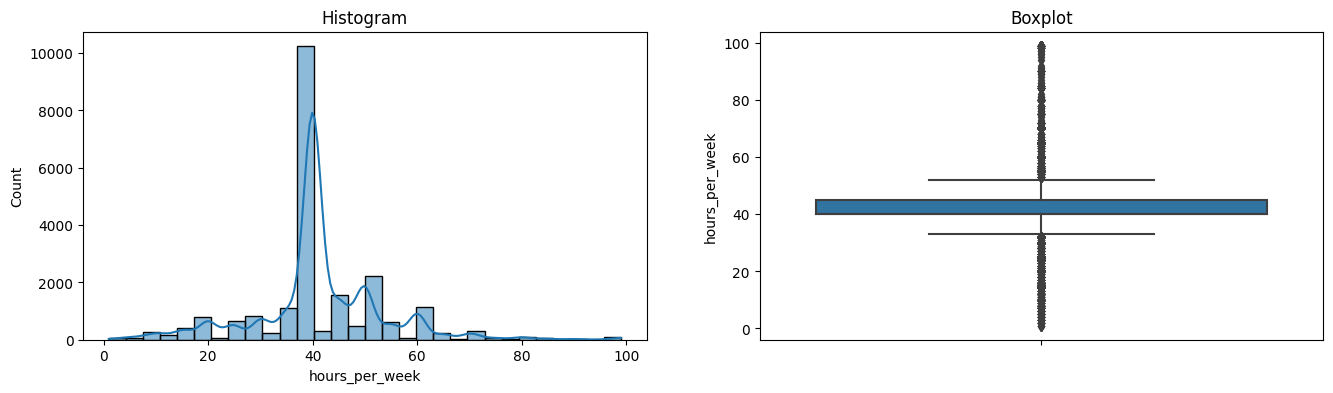


Skewness Value :  0.3330226320348319


In [370]:
# Set value histogram & boxplot and show skewness from feature hours_per_week

diagnostic_plots(X_train, 'hours_per_week')
print('\nSkewness Value : ', X_train['hours_per_week'].skew())

Based on the boxplot and skewness value, we can conclude that :
- There are outliers in almost all numerical features.
- The skewness of the features `age`, `capital_gain`, `capital_loss` and `hours_per_week` shows that the data distribution tends to have a longer tail on the right side of the center. In other words, values greater than the mean tend to be more widely spread to the right of the mean.
- The slope level of the `education_num` feature indicates that the data distribution tends to have a longer tail on the left side of its center. In other words, values greater than the mean tend to be more widely spread to the left of the mean.

#### V.III.II. Outlier Detection

Based on what we see through the histogram & boxplot above, the next step is to detect outliers in the `age`, `capital_gain`, `capital_loss`, `hours_per_week` and `education_num` features.

##### V.III.II.I. Outlier Detection from `age` 

In [371]:
# Make function to detection outlier on age feature

def find_skewed_boundaries_age(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary_age = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_age = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_age, lower_boundary_age

In [372]:
# Show upper & lower boundary from age feature

upper_boundary_age, lower_boundary_age = find_skewed_boundaries_age(X_train, 'age', 1.5)
upper_boundary_age, lower_boundary_age

(76.5, 0.5)

In [373]:
# Store outliers in a variable

outliers_age = X_train['age'][(X_train['age'] < lower_boundary_age) | (X_train['age'] > upper_boundary_age)]

In [374]:
# Show the number and percentage of outliers for age

print('Total age                                             : ', X_train['age'].count())
print('Distance with older than 76.5 and younger than 0.5    : ', outliers_age.count())
print('% Distance with older than 76.5 and younger than 0.5  : ', outliers_age.count() / X_train['age'].count() * 100)

Total age                                             :  21971
Distance with older than 76.5 and younger than 0.5    :  114
% Distance with older than 76.5 and younger than 0.5  :  0.5188657776159483


Since the outliers are 0.5%, I will change the outliers value to mean because the data distribution looks symetrics.

In [375]:
# Change the outlier's value

mean_age  = X_train[(X_train['age'] >= lower_boundary_age) & (X_train['age'] <= upper_boundary_age)].mean(numeric_only=True)

In [376]:
X_train['age'][(X_train['age'] < lower_boundary_age) | (X_train['age'] > upper_boundary_age)] = np.nan

/var/folders/xc/1vjvgyy51c76j9nfylh6sv180000gp/T/ipykernel_12122/1211819736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age'][(X_train['age'] < lower_boundary_age) | (X_train['age'] > upper_boundary_age)] = np.nan


In [377]:
X_train['age'].isna().sum()

114

In [378]:
X_train.fillna(mean_age, inplace=True)

In [379]:
X_train['age'].isna().sum()

0

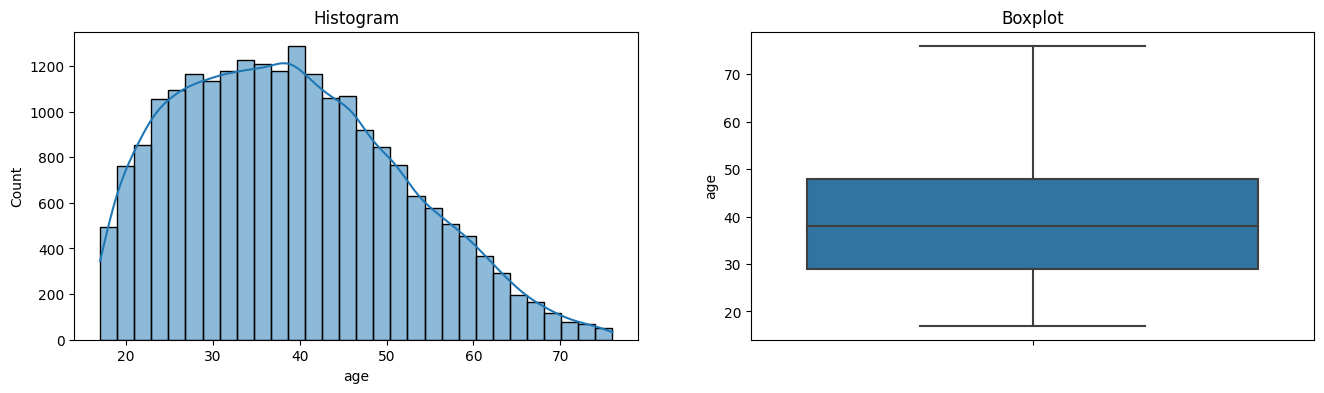


Skewness Value :  0.4011753863688635


In [380]:
# Make plot and show skewness level.

diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

##### V.III.II.II. Outlier Detection from `education_num`

In [381]:
# Make function to detection outlier on education_num feature

def find_skewed_boundaries_en(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary_en = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_en = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_en, lower_boundary_en

In [382]:
# Show upper & lower boundary from education_num feature

upper_boundary_en, lower_boundary_en = find_skewed_boundaries_en(X_train, 'education_num', 1.5)
upper_boundary_en, lower_boundary_en

(19.0, 3.0)

In [383]:
# Store outliers in a variable

outliers_en = X_train['education_num'][(X_train['education_num'] < lower_boundary_en) | (X_train['education_num'] > upper_boundary_en)]

In [384]:
# Show the number and percentage of outliers for education_num

print('Total education_num                                           : ', X_train['education_num'].count())
print('education_num with higher than 19.0 and lower than 3.0        : ', outliers_en.count())
print('% education_num with higher than 19.0 and lower than 3.0      : ', outliers_en.count() / X_train['education_num'].count() * 100)

Total education_num                                           :  21971
education_num with higher than 19.0 and lower than 3.0        :  161
% education_num with higher than 19.0 and lower than 3.0      :  0.7327841245277866


Since the outliers are 0.74%, I will change the outliers value to mean because the data distribution looks symetrics.

In [385]:
# Change the outlier's value

mean_en  = X_train[(X_train['education_num'] >= lower_boundary_en) & (X_train['education_num'] <= upper_boundary_en)].mean(numeric_only=True)

In [386]:
X_train['education_num'][(X_train['education_num'] < lower_boundary_en) | (X_train['education_num'] > upper_boundary_en)] = np.nan

/var/folders/xc/1vjvgyy51c76j9nfylh6sv180000gp/T/ipykernel_12122/2451967161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['education_num'][(X_train['education_num'] < lower_boundary_en) | (X_train['education_num'] > upper_boundary_en)] = np.nan


In [387]:
X_train['education_num'].isna().sum()

161

In [388]:
X_train.fillna(mean_en, inplace=True)

In [389]:
X_train['education_num'].isna().sum()

0

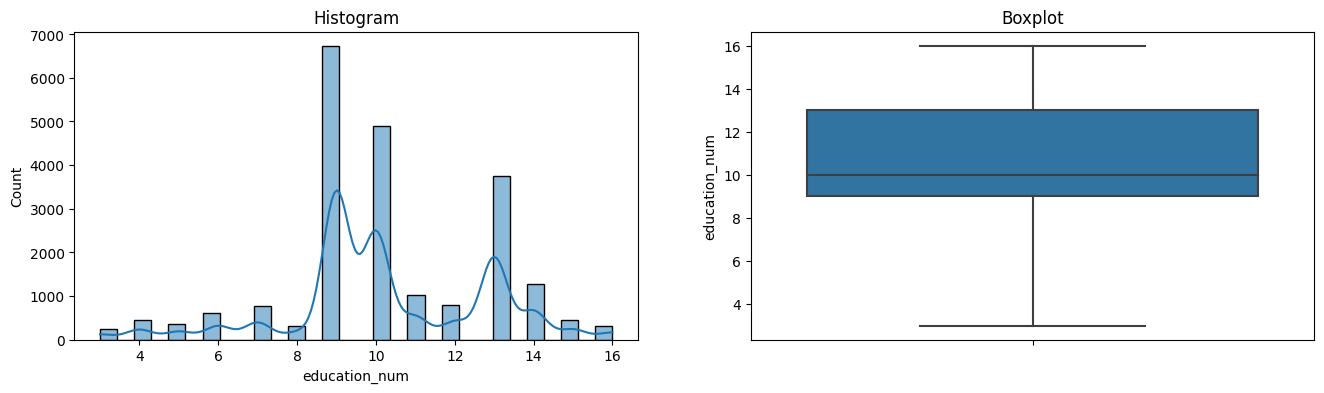


Skewness Value :  -0.19632599855791777


In [390]:
# Make plot and show skewness level.

diagnostic_plots(X_train, 'education_num')
print('\nSkewness Value : ', X_train['education_num'].skew())

##### V.III.II.III. Outlier Detection from `capital_gain`

In [391]:
# Make function to detection outlier on capital_gain feature

def find_skewed_boundaries_cg(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary_cg = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_cg = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_cg, lower_boundary_cg

In [392]:
# Show upper & lower boundary from capital_gain feature

upper_boundary_cg, lower_boundary_cg = find_skewed_boundaries_cg(X_train, 'capital_gain', 1.5)
upper_boundary_cg, lower_boundary_cg

(0.0, 0.0)

In [393]:
# Store outliers in a variable

outliers_cg = X_train['capital_gain'][(X_train['capital_gain'] < lower_boundary_cg) | (X_train['capital_gain'] > upper_boundary_cg)]

In [394]:
# Show the number and percentage of outliers for capital_gain

print('Total capital_gain                                      : ', X_train['capital_gain'].count())
print('capital_gain with higher than 0 and lower than 0        : ', outliers_cg.count())
print('% capital_gain with higher than 0 and lower than 0      : ', outliers_cg.count() / X_train['capital_gain'].count() * 100)

Total capital_gain                                      :  21971
capital_gain with higher than 0 and lower than 0        :  2047
% capital_gain with higher than 0 and lower than 0      :  9.316826726139002


Since the outliers are 9.4%, I will keep the outlier because I need the value.

##### V.III.II.IV. Outlier Detection from `capital_loss`

In [395]:
# Make function to detection outlier on capital_loss feature

def find_skewed_boundaries_cl(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary_cl = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_cl = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_cl, lower_boundary_cl

In [396]:
# Show upper & lower boundary from capital_loss feature

upper_boundary_cl, lower_boundary_cl = find_skewed_boundaries_cl(X_train, 'capital_loss', 1.5)
upper_boundary_cl, lower_boundary_cl

(0.0, 0.0)

In [397]:
# Store outliers in a variable

outliers_cl = X_train['capital_loss'][(X_train['capital_loss'] < lower_boundary_cl) | (X_train['capital_loss'] > upper_boundary_cl)]
#outliers_cl = pd.DataFrame(outliers_cl)
#outliers_cl

In [398]:
# Show the number and percentage of outliers for capital_gain

print('Total capital_loss                                      : ', X_train['capital_loss'].count())
print('capital_loss with higher than 0 and lower than 0        : ', outliers_cl.count())
print('% capital_loss with higher than 0 and lower than 0      : ', outliers_cl.count() / X_train['capital_loss'].count() * 100)

Total capital_loss                                      :  21971
capital_loss with higher than 0 and lower than 0        :  1178
% capital_loss with higher than 0 and lower than 0      :  5.361613035364799


Since the outliers are 5.2%, I will keep the outlier because I need the value.

##### V.III.II.II. Outlier Detection from `hours_per_week`

In [399]:
# Make function to detection outlier on hours_per_week feature

def find_skewed_boundaries_hpw(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary_hpw = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_hpw = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_hpw, lower_boundary_hpw

In [400]:
# Show upper & lower boundary from hours_per_week feature

upper_boundary_hpw, lower_boundary_hpw = find_skewed_boundaries_hpw(X_train, 'hours_per_week', 1.5)
upper_boundary_hpw, lower_boundary_hpw

(52.5, 32.5)

In [401]:
# Store outliers in a variable

outliers_hpw = X_train['hours_per_week'][(X_train['hours_per_week'] < lower_boundary_hpw) | (X_train['hours_per_week'] > upper_boundary_hpw)]

In [402]:
# Show the number and percentage of outliers for hours_per_week

print('Total hours_per_week                                     : ', X_train['hours_per_week'].count())
print('hours_per_week with more than 52.5 and less than 32.5    : ', outliers_hpw.count())
print('% hours_per_week with more than 52.5 and less than 32.5  : ', outliers_hpw.count() / X_train['hours_per_week'].count() * 100)

Total hours_per_week                                     :  21971
hours_per_week with more than 52.5 and less than 32.5    :  6102
% hours_per_week with more than 52.5 and less than 32.5  :  27.772973465022076


Since the outliers are 27.8%, I will change the outliers value to mean because the data distribution looks symetrics.

In [403]:
# Change the outlier's value

mean_hpw  = X_train[(X_train['hours_per_week'] >= lower_boundary_hpw) & (X_train['hours_per_week'] <= upper_boundary_hpw)].mean(numeric_only=True)

In [404]:
X_train['hours_per_week'][(X_train['hours_per_week'] < lower_boundary_hpw) | (X_train['hours_per_week'] > upper_boundary_hpw)] = np.nan

/var/folders/xc/1vjvgyy51c76j9nfylh6sv180000gp/T/ipykernel_12122/747316815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['hours_per_week'][(X_train['hours_per_week'] < lower_boundary_hpw) | (X_train['hours_per_week'] > upper_boundary_hpw)] = np.nan


In [405]:
X_train['hours_per_week'].isna().sum()

6102

In [406]:
X_train.fillna(mean_hpw, inplace=True)

In [407]:
X_train['hours_per_week'].isna().sum()

0

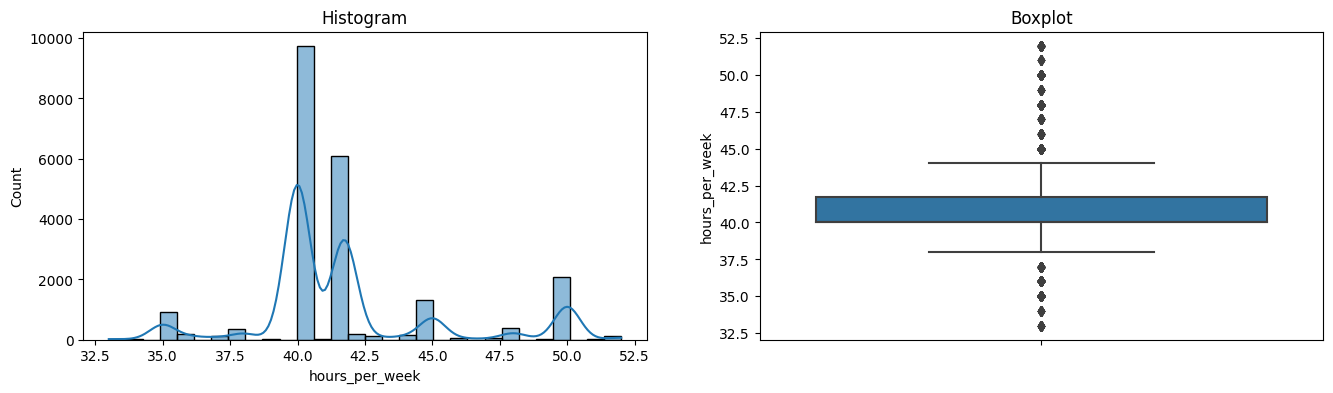


Skewness Value :  1.0727350656733838


In [408]:
# Make plot and show skewness level.

diagnostic_plots(X_train, 'hours_per_week')
print('\nSkewness Value : ', X_train['hours_per_week'].skew())

##### V.III.II.VI. Equalize index between X_train and y_train.

In [409]:
# Take the index of X_train that has been cleared of outliers.

X_index = X_train.index.values.tolist()

In [410]:
# Equalize index between X_train and y_train.

X_train = X_train.loc[X_index]

y_train.drop(y_train.index.difference(X_train.index), inplace=True)

In [411]:
# Check the shape between X_train and y_train.

print(X_train.shape)
print(y_train.shape)

(21971, 10)
(21971,)


### V.V. Handling Missing Value

Here I will check the missing values of X_train and y_train, remove the missing values if any, and then equalize the indexes of X_train and y_train.

In [412]:
# Missing Value Checking for X_train

X_train.isna().sum()

age               0
workclass         0
education_num     0
marital_status    0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [413]:
# Missing Value Checking for y_train

y_train.isna().sum()

0

In [414]:
# Take the index of X_train that has been cleared from missing value.

X_train_index = X_train.index.values.tolist()

In [415]:
# Equalize index between X_train and y_train.

X_train = X_train.loc[X_train_index]

y_train.drop(y_train.index.difference(X_train.index), inplace=True)

In [416]:
# Check shape of X_train and y_train

print(y_train.shape)
print(X_train.shape)

(21971,)
(21971, 10)


Here I will check the missing values of X_test and y_test, remove the missing values if any, and then equalize the indexes of X_test and y_test.

In [417]:
# Missing Value Checking for X_test

X_test.isna().sum()

age               0
workclass         0
education_num     0
marital_status    0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [418]:
# Missing Value Checking for y_test

y_test.isna().sum()

0

In [419]:
# Take the index of X_test that has been cleared from missing value.

X_test_index = X_test.index.values.tolist()

In [420]:
# Equalize index between X_test and Y_test.

X_test = X_test.loc[X_test_index]

y_test.drop(y_test.index.difference(X_test.index), inplace=True)

In [421]:
# Check shape of X_test and y_test

print(y_test.shape)
print(X_test.shape)

(5493,)
(5493, 10)


### V.VI. Split between Numeric Columns and Category Columns

In [527]:
# Get Numeric Columns and Categorical Columns

num_columns = X_train[['age', 'capital_gain', 'capital_loss', 'hours_per_week']].columns.to_list()
cat_columns = X_train[['workclass', 'marital_status', 'relationship', 'race', 'sex']].columns.to_list()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['age', 'capital_gain', 'capital_loss', 'hours_per_week']
Cat Columns :  ['workclass', 'marital_status', 'relationship', 'race', 'sex']


In [528]:
# Split train set and test set based on column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_cat

,workclass,marital_status,relationship,race,sex
22637,Private,Married-civ-spouse,Husband,White,Male
29118,Private,Divorced,Not-in-family,White,Male
27980,Self-emp-inc,Never-married,Own-child,White,Female
18281,Private,Married-civ-spouse,Husband,White,Male
20676,Private,Never-married,Not-in-family,White,Male
...,...,...,...,...,...
10863,State-gov,Divorced,Unmarried,White,Female
8431,Private,Never-married,Own-child,Black,Male
19993,Private,Divorced,Unmarried,White,Male
8433,Private,Never-married,Own-child,Black,Male


- Columns that are numerical are `age`, `capital_gain`, `capital_loss`, `hours_per_week`.

- Columns that are categorical are `workclass`, `education_num`, `marital_status`, `relationship`, `race`, `sex`.


The numerical column will be scaled and the categorical column will be encoded.

### V.VII. Feature Scalling

In this step, I will use the Standard Scaler because the average data distribution is normal. This is evidenced by the distance between the mean and median values.

In [529]:
# Show basic statistic

X_train_num.describe()

,age,capital_gain,capital_loss,hours_per_week
count,21971.000000,21971.000000,21971.000000,21971.000000
mean,38.864300,1259.910746,100.448091,41.724494
std,12.776624,8132.891927,430.550855,3.540002
min,17.000000,0.000000,0.000000,33.000000
25%,29.000000,0.000000,0.000000,40.000000
50%,38.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,41.724494
max,76.000000,99999.000000,4356.000000,52.000000


In [470]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[-8.50345665e-01, -1.54918992e-01, -2.33306648e-01,
        -4.87156158e-01],
       [ 4.80239519e-01, -1.54918992e-01, -2.33306648e-01,
        -2.00722768e-15],
       [-9.28615382e-01, -1.54918992e-01, -2.33306648e-01,
         9.25304756e-01],
       ...,
       [ 2.45430369e-01, -1.54918992e-01, -2.33306648e-01,
         9.25304756e-01],
       [-1.00688510e+00, -1.54918992e-01, -2.33306648e-01,
        -4.87156158e-01],
       [ 1.67160652e-01, -1.54918992e-01, -2.33306648e-01,
        -4.87156158e-01]])

### V.VIII. Feature Encoding

In this step, I will use OneHotEncoder because the data is nominal type.

In [530]:
# Show categorical feature

X_train_cat

,workclass,marital_status,relationship,race,sex
22637,Private,Married-civ-spouse,Husband,White,Male
29118,Private,Divorced,Not-in-family,White,Male
27980,Self-emp-inc,Never-married,Own-child,White,Female
18281,Private,Married-civ-spouse,Husband,White,Male
20676,Private,Never-married,Not-in-family,White,Male
...,...,...,...,...,...
10863,State-gov,Divorced,Unmarried,White,Female
8431,Private,Never-married,Own-child,Black,Male
19993,Private,Divorced,Unmarried,White,Male
8433,Private,Never-married,Own-child,Black,Male


In [531]:
# Feature Encoding using OneHotEncoder

XTRC = X_train_cat[['workclass', 'marital_status', 'relationship', 'race', 'sex']]
XTSC = X_test_cat[['workclass', 'marital_status', 'relationship', 'race', 'sex']]

OHE = OneHotEncoder(sparse_output=False)

X_train_cat_encoded = OHE.fit_transform(XTRC)
X_test_cat_encoded  = OHE.transform(XTSC)

feature_names = OHE.get_feature_names_out(input_features=['workclass', 'marital_status', 'relationship', 'race', 'sex'])

X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=feature_names)
X_test_cat_encoded  = pd.DataFrame(X_test_cat_encoded, columns=feature_names)


In [532]:
# Target Encoding using LabelEncoder

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded  = le.transform(y_test)


### V.IX. Concate between Numeric Columns and Categorical Columns

In [533]:
# Concate columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)
X_train_final

array([[-0.85034567, -0.15491899, -0.23330665, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.48023952, -0.15491899, -0.23330665, ...,  1.        ,
         0.        ,  1.        ],
       [-0.92861538, -0.15491899, -0.23330665, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.24543037, -0.15491899, -0.23330665, ...,  1.        ,
         0.        ,  1.        ],
       [-1.0068851 , -0.15491899, -0.23330665, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.16716065, -0.15491899, -0.23330665, ...,  0.        ,
         1.        ,  0.        ]])

In [535]:
# Create dataframe of X_train_final

X_train_final_df = pd.DataFrame(X_train_final, columns = [num_columns + list(feature_names)])
X_train_final_df

,age,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,-0.850346,-0.154919,-0.233307,-4.871562e-01,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.480240,-0.154919,-0.233307,-2.007228e-15,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.928615,-0.154919,-0.233307,9.253048e-01,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.928615,-0.154919,-0.233307,-4.871562e-01,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.067648,-0.154919,-0.233307,-2.007228e-15,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21966,0.793318,-0.154919,-0.233307,6.428126e-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
21967,-1.319964,-0.154919,-0.233307,-4.871562e-01,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21968,0.245430,-0.154919,-0.233307,9.253048e-01,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
21969,-1.006885,-0.154919,-0.233307,-4.871562e-01,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## VI. Model Definition

In this case, I will compare the accuracy results of the Logistic Regression model with the Support Vector Classifier model.

In Logistic Regression, I will use penalty type parameter `L1` or Lasso Regression, random state I set 5, maximum iteration I set 100 and solver type I use `liblinear`.

In SVC, I will use the default parameters.

In [536]:
# Training using Logistic Regression & SVC

model_log_reg = LogisticRegression(penalty='l1', random_state=5, max_iter=100, solver='liblinear')
model_svc     = SVC(random_state=5)

## VII. Model Training

In [537]:
# Train the Logistic Regression model 

model_log_reg.fit(X_train_final, y_train_encoded)

LogisticRegression(penalty='l1', random_state=5, solver='liblinear')

In [538]:
# Train the SVC model 

model_svc.fit(X_train_final, y_train_encoded)

SVC(random_state=5)

## VIII. Model Evaluation

### VIII.I. Logistic Regression Model

In [539]:
# Predict Train-set and Test-set on Logistic Regression Model

y_pred_train_log = model_log_reg.predict(X_train_final)
y_pred_test_log = model_log_reg.predict(X_test_final)
y_pred_train_log

array([0, 0, 0, ..., 0, 0, 0])

In [540]:
# Classification Report of Logistic Regression Model

print('Classification Report of Logistic Regression Model\n')
print('Train')
print(classification_report(y_train_encoded,y_pred_train_log))
print('')
print('Test')
print(classification_report(y_test_encoded,y_pred_test_log))


Classification Report of Logistic Regression Model

Train
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     16325
           1       0.71      0.44      0.55      5646

    accuracy                           0.81     21971
   macro avg       0.77      0.69      0.71     21971
weighted avg       0.80      0.81      0.79     21971


Test
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4118
           1       0.63      0.52      0.57      1375

    accuracy                           0.80      5493
   macro avg       0.74      0.71      0.72      5493
weighted avg       0.79      0.80      0.80      5493



Confusion Matrix Logistic Regression Model



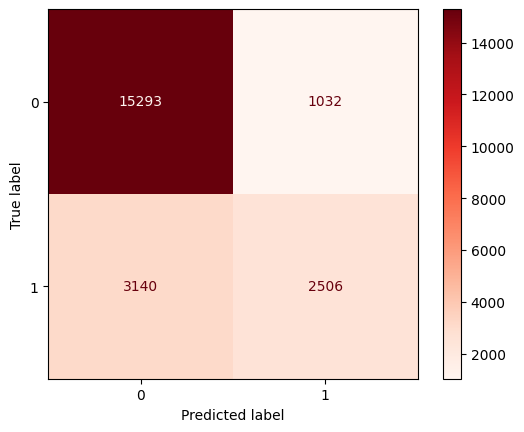

In [541]:
# Confusion Matrix of Logistic Regression Model

print('Confusion Matrix Logistic Regression Model\n')
ConfusionMatrixDisplay.from_estimator(model_log_reg, X_train_final, y_train_encoded, cmap='Reds');

The classification results given are from a logistic regression model that has been trained on the training data and tested on the test data. Let's look at the insights that can be drawn from these two classification results and compare them:

1. Classification Results on Training Data:

- Precision measures the extent to which the class predicted as positive is actually positive. Class 0 has a precision of 0.83, which indicates that 83% of the predicted class 0 is actually class 0. Class 1 has a precision of 0.71, which means 71% of the predicted class 1 is actually class 1.
- Recall measures the extent to which the model is able to detect positive instances. Class 0 has a recall of 0.94, which means the model was able to detect 94% of all class 0 instances in the dataset. Class 1 has a recall of 0.44, which means the model only detected 44% of all class 1 instances.
- F1-score combines precision and recall into one number that represents the balance between the two. Class 0 has an F1-score of 0.88, while class 1 has an F1-score of 0.55.
The accuracy on the training data is 0.81, which means 81% of the instances in the training data have been classified correctly.
Looking at the macro avg and weighted avg of precision, recall, and F1-score, we can see that the model performs better in predicting class 0 than class 1.

2. Classification Results on Test Data:

Precision, recall, F1-score, and accuracy on the test data provide similar information as on the training data.
However, it should be noted that the performance of the model on the test data is slightly lower than on the training data. This is a common occurrence as the model is more familiar with the training data and may not be able to generalize perfectly on data that it has not seen before.

Comparison:

In general, the classification results on the training data showed better performance than on the test data. This indicates slight signs of overfitting, where the model may focus too much on the characteristics of the training data and may not be able to generalize the patterns well to different data.
The two classes (0 and 1) have significant performance differences in terms of precision, recall and F1-score. Class 0 performs better than class 1 in all these metrics.
It is important to check if there are any factors that cause low performance in class 1, such as class imbalance or less informative features.


In [561]:
# defining parameter range
param_grid = {'C'     	: [0.1, 1, 10, 100],
			'penalty' 	: ['l1', 'l2']}

grid = GridSearchCV(model_log_reg, param_grid, refit = True, verbose = True, cv=5)

# fitting the model for grid search
grid.fit(X_train_final, y_train_encoded)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', random_state=5,
                                          solver='liblinear'),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=True)

In [562]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1, random_state=5, solver='liblinear')


In [563]:
grid_predictions_train = grid.predict(X_train_final)

# print classification report
print(classification_report(y_train_encoded, grid_predictions_train))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     16325
           1       0.71      0.44      0.55      5646

    accuracy                           0.81     21971
   macro avg       0.77      0.69      0.71     21971
weighted avg       0.80      0.81      0.79     21971



In [565]:
grid_predictions_test = grid.predict(X_test_final)

# print classification report
print(classification_report(y_test_encoded, grid_predictions_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4118
           1       0.63      0.52      0.57      1375

    accuracy                           0.80      5493
   macro avg       0.74      0.71      0.72      5493
weighted avg       0.79      0.80      0.80      5493



In the logistic regression classification results, there are several evaluation metrics given for each class (class 0 and class 1) as well as the average (macro and weighted) of these metrics. The main metrics measured in this case are precision, recall, and f1-score. The following insights can be drawn from the classification results:

**Before Hyperparameter Setting:**
- Train Set:
1. Class 0 has a good precision (0.83) and high recall (0.94), indicating that the model tends to be good at identifying members of class 0 and rarely misclassifies them.
2. Class 1 has a lower precision (0.71) and a similarly low recall (0.44), indicating that the model is less good at identifying class 1 members, and tends to misclassify class 1 members as class 0 more often.
3. The weighted average f1-score (0.79) shows that the model performs better in classifying the majority class (class 0).

- Test Set:
1. The results in the test set are similar to the train set. Class 0 has good precision (0.85) and high recall (0.90), while class 1 has lower precision and recall (0.63 and 0.52).
2. The average weighted f1-score (0.80) in the test set also shows that the model has better performance in classifying the majority class (class 0).

**After Hyperparameter Setting:**

- The insights drawn from these results are the same as the results before hyperparameter setting. However, it can be seen that the evaluation results have not changed after setting the hyperparameters. This may indicate that the hyperparameter setting has not made a significant change to the model's performance.

In both cases, the model performs better at identifying members of the majority class (class 0) than identifying members of the minority class (class 1). This could be a problem if you have a strong preference in avoiding false negative errors in the minority class, which may need further treatment such as sampling techniques or threshold adjustments.

### VIII.II. Support Vector Classification Model

In [546]:
# Predict Train-set and Test-set on SVC Model

y_pred_train_svc = model_svc.predict(X_train_final)
y_pred_test_svc = model_svc.predict(X_test_final)
y_pred_train_svc

array([0, 0, 0, ..., 0, 0, 0])

In [547]:
# Classification Report of SVC Model

print('Classification Report of SVC Model\n')
print('Train')
print(classification_report(y_train_encoded,y_pred_train_svc))
print('')
print('Test')
print(classification_report(y_test_encoded,y_pred_test_svc))


Classification Report of SVC Model

Train
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16325
           1       0.76      0.46      0.58      5646

    accuracy                           0.82     21971
   macro avg       0.80      0.71      0.73     21971
weighted avg       0.82      0.82      0.81     21971


Test
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4118
           1       0.55      0.51      0.53      1375

    accuracy                           0.77      5493
   macro avg       0.70      0.69      0.69      5493
weighted avg       0.77      0.77      0.77      5493



From the classification results using Support Vector Classifier (SVC), there are several insights that can be taken from the evaluation metrics displayed on the training and testing data. The following are the insights from the classification results given:

1. Classification Results on Training Data:
- Precision: Precision measures how many of the positive results are correctly predicted. For class 0, the precision is 0.84, meaning that 84% of the predictions expressed as class 0 are correct. As for class 1, the precision is 0.76, which means 76% of the predictions declared as class 1 are correct.

- Recall: Recall measures how many of the total positive cases were successfully identified by the model. For class 0, the recall is 0.95, which means 95% of the total class 0 data was correctly identified by the model. Whereas for class 1, the recall is 0.46, which means that only 46% of the class 1 data was successfully identified.

- F1-Score: F1-score is the harmonic mean between precision and recall. For class 0, the F1-score is 0.89, and for class 1, the F1-score is 0.58. A higher F1-score indicates a good balance between precision and recall.

- Accuracy: Accuracy measures the overall percentage of correct predictions. On the training data, the accuracy was 0.82 or 82%.

2. Classification Results on Testing Data:
- Precision: For class 0, the precision is 0.84, while for class 1, the precision is 0.55.

- Recall: For class 0, the recall is 0.86, and for class 1, the recall is 0.51.

- F1-Score: F1-score for class 0 is 0.85, and for class 1 is 0.53.

- Accuracy: The accuracy on the testing data is 0.77 or 77%.

Comparison Between Training Data and Testing Data:
- In general, the evaluation results on the testing data have a lower value compared to the training data. This is a common occurrence as models tend to perform better on previously viewed data (training data) than on data that has never been viewed (testing data).

- It can be seen that the model tends to be better at classifying class 0 than class 1. This could indicate that there is an imbalance in the class distribution, where the model tends to focus more on the majority class (class 0) than the minority class (class 1).

- The significant difference between the precision and recall values for class 1 suggests that the model may have many false negatives (cases that should be class 1 but are predicted as class 0). This can be seen from the low recall value in class 1, especially in the training data.

- The accuracy of the training data is higher than that of the testing data, which indicates overfitting of the model. The model tends to memorize the training data and is not able to generalize well to data that has never been seen.

- F1-score is a good metric to measure the trade-off between precision and recall, and here we can see that the F1-score value on the testing data is lower than that on the training data, indicating that the model performs better on the training data.

Confusion Matrix SVC Model



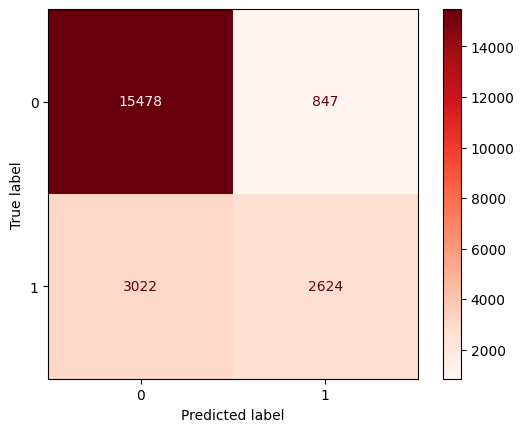

In [548]:
# Confusion Matrix of SVC Model

print('Confusion Matrix SVC Model\n')
ConfusionMatrixDisplay.from_estimator(model_svc, X_train_final, y_train_encoded, cmap='Reds');

In [549]:
# Defining parameter range
param_grid = {'C'   : [0.1, 1, 10],
			'gamma' : [0.1, 0.01],
			'kernel': ['rbf']}

grid = GridSearchCV(model_svc, param_grid, refit = True, verbose = True, cv=5)

# Fitting the model for grid search
grid.fit(X_train_final, y_train_encoded)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(random_state=5),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=True)

In [550]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1, random_state=5)


In [551]:
grid_predictions = grid.predict(X_train_final)

# print classification report
print(classification_report(y_train_encoded, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16325
           1       0.78      0.47      0.59      5646

    accuracy                           0.83     21971
   macro avg       0.81      0.71      0.74     21971
weighted avg       0.82      0.83      0.81     21971



In [552]:
grid_predictions = grid.predict(X_test_final)

# print classification report
print(classification_report(y_test_encoded, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4118
           1       0.54      0.51      0.53      1375

    accuracy                           0.77      5493
   macro avg       0.69      0.68      0.69      5493
weighted avg       0.77      0.77      0.77      5493



From the classification results using Support Vector Classifier (SVC) to perform classification in two scenarios, before and after setting the hyperparameters. Let's analyze these results:

**Before Hyperparameter Setting:**

- Train Set:
1. Accuracy: 0.82
2. Precision for class 0: 0.84, class 1: 0.76
3. Recall for class 0: 0.95, class 1: 0.46
4. F1-score for class 0: 0.89, class 1: 0.58

- Test Set:
1. Accuracy: 0.77
2. Precision for class 0: 0.84, class 1: 0.55
3. Recall for class 0: 0.86, class 1: 0.51
4. F1-score for class 0: 0.85, class 1: 0.53

**After Setting Hyperparameters:**

- Train Set:
1. Accuracy: 0.83
2. Precision for class 0: 0.84, class 1: 0.78
3. Recall for class 0: 0.95, class 1: 0.47
4. F1-score for class 0: 0.89, class 1: 0.59

- Test Set:
1. Accuracy: 0.77
2. Precision for class 0: 0.84, class 1: 0.54
3. Recall for class 0: 0.86, class 1: 0.51
4. F1-score for class 0: 0.85, class 1: 0.53

**Comparison of Classification Results:**

- Accuracy: There is no significant change between before and after hyperparameter setting.

- Precision: After hyperparameter setting, the precision for class 1 (minority) increased. This indicates the model is better at identifying class 1.

- Recall: Recall for class 1 also increased after hyperparameter setting, especially in the training data.

- F1-score: The F1-score for class 1 also improved after setting the hyperparameter, indicating an improvement in both the precision and recall of class 1.

In both scenarios, I have the problem of class imbalance, where class 1 has fewer examples than class 0. Therefore, the improvements seen in metrics such as precision, recall, and F1-score for class 1 after setting the hyperparameter suggest that this setting helps the model to be better at classifying classes that are harder to identify.

## IX. Model Saving

In [553]:
# Save the files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder_ohe.pkl', 'wb') as file_4:
  pickle.dump(OHE, file_4)

with open('model_log_reg.pkl', 'wb') as file_5:
  pickle.dump(model_log_reg, file_5)
  
with open('model_svc.pkl', 'wb') as file_6:
  pickle.dump(model_svc, file_6)

## X. Model Inference

This step can be seen in : h8dsft_P1G1_Theo_Inference.ipynb

## XI. Conclusion

Based on the results of testing the Logistic Regression and Support Vector Classifier methods using this dataset, it can be concluded that:

- Hyperparameters can make the model better, but they can also make the model less good or the same.
- To make the model better, we can add more hyperparameters to make it more varied and find better hyperparameters.
- It is possible that better handling of features could make the model better.
- Logistic Regression uses a logistic (sigmoid) function to model class probabilities as a linear function of the input features. SVC, on the other hand, focuses on finding the hyperplane that best separates the classes in the feature space.
- Logistic Regression seeks to minimize a loss function that is usually related to the likelihood of the binomial distribution (for binary classification). SVC seeks to maximize the margin between classes and identify the hyperplane that best separates the classes.
- SVC relies heavily on the concept of margin (the distance between the separating hyperplane and the closest training examples from both classes). Logistic Regression does not directly deal with this concept of margin.
- Logistic Regression does not have a built-in mechanism to deal with the problem of class imbalance. On the other hand, SVC can use class weights or other imbalance handling techniques.
- SVM (including SVC) has a feature called "kernel trick", which allows it to work in higher feature spaces, even with data that is not linearly separable. Logistic Regression tends to work better on data with linear relationships.
- Results from Logistic Regression are easier to interpret as they are class probabilities. Results from SVM (including SVC) are not always as easy to interpret, especially when kernels are used.
- Logistic Regression tends to be easier to control the complexity of the model. In SVC, there are hyperparameters such as C (misclassification penalty parameter) and the choice of kernel that affect the complexity of the model.

In general, Logistic Regression is more suitable for simple linear classification problems and has better interpretability. Support Vector Classifier (SVC) tends to be better at tackling problems with complex separations, even by utilizing "kernel tricks", but can be more difficult to interpret and requires careful parameter selection. The choice between the two depends on the nature of the data and the purpose of the analysis.

## Conceptual Problems

1. What is **coefficient** in logistic regression?

In logistic regression, **coefficients** (or often called weights) refer to parameters that describe the relationship between features and the log-odds probability of the resulting event (for example, the probability of a successful event in binary analysis). In a logistic regression model, the main goal is to find coefficients that best fit the data so that the model can accurately predict the output probabilities.

2. What is **Support Vector** in SVM?

**Support Vector** refer to a group of data points that are closest to the dividing line (in the case of linear SVM) or hyperplane (in the case of non-linear SVM) between two different classes.

3. What is the function of **kernel** parameters in SVM? Explain one of the kernels that you understand!

In Support Vector Machine (SVM), the kernel parameter is one of the key components that allow SVM to handle cases where the data is not linearly separable in the original feature space. Kernels are mathematical functions used to transform the data to a higher dimension, where linear separation may be easier to achieve.

This transformation allows the SVM to search for a more complex separating hyperplane in the higher feature space, without actually performing calculations in that higher dimension. In this sense, the kernel allows non-linear classification modeling without the need to explicitly compute in the higher feature space, which can be very computationally-intensive.

**Gaussian RBF (Radial Basis Function) Kernel**. 

This kernel transforms data into infinite dimensions by using a Gaussian function that depends on the distance between data points. This Gaussian function creates a "blasting" of the data into higher dimensions around the reference points (support vectors), and from there, linear splitting may be easier to perform.

The advantages of the Gaussian RBF kernel are its flexibility in handling data that is not linearly separable and its ability to handle complex patterns. However, the gamma parameter needs to be set carefully, as incorrect values may result in overfitting or underfitting. In practice, kernel selection and parameter setting are important parts of tuning SVM models to obtain optimal performance.